### Laboration deep learning AI21
---
Syftet med den här labben är att använda deep learning för computer vision för att lära sig att klassificera
olika objekt.
I den här labben kommer du få jobba med bildbehandling, filhantering, bygga upp egna tränings, validerings
och testdataset från en mängd av bilder. Vidare får du jobba med begränsade datamängder för att efterlikna
verkligheten när dataanskaffning är en oerhört dyr process. Efter databehandlingen och databearbetningen
kommer du få pröva olika slags convolutional neural networks tränade från scratch och slutligen använda
dig av transfer learning för att återanvända nätverk skapade av toppforskare inom computer vision.

---
0. EDA och filhantering (*)

a) Börja med att ladda ned datasetet Dogs vs Cats från Kaggle. Extrahera den och lägg den i din labfolder,
glöm inte att lägga till den till .gitignore.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import cv2
import random
import os
import shutil


plt.style.use("seaborn-white")

In [40]:
train_path = "original_data/train/train/"
files_train_path = os.listdir(train_path)

images_names = pd.DataFrame({"file_name" : files_train_path})
print(f"total number of images: {len(images_names)}")
images_names.head(10)

df_cat = images_names[images_names["file_name"].str.contains("cat")==True]
df_dog = images_names[images_names["file_name"].str.contains("dog")==True]

print(f"number of cats: {len(df_cat)}, number of dogs: {len(df_dog)}")

total number of images: 25000
number of cats: 12500, number of dogs: 12500


In [41]:
df_cat

file_name
0         cat.0.jpg
1         cat.1.jpg
2        cat.10.jpg
3       cat.100.jpg
4      cat.1000.jpg
...             ...
12495  cat.9995.jpg
12496  cat.9996.jpg
12497  cat.9997.jpg
12498  cat.9998.jpg
12499  cat.9999.jpg

[12500 rows x 1 columns]

In [42]:
df_dog

file_name
12500     dog.0.jpg
12501     dog.1.jpg
12502    dog.10.jpg
12503   dog.100.jpg
12504  dog.1000.jpg
...             ...
24995  dog.9995.jpg
24996  dog.9996.jpg
24997  dog.9997.jpg
24998  dog.9998.jpg
24999  dog.9999.jpg

[12500 rows x 1 columns]

b) Läs in 10 bilder slumpmässigt, plotta dem och extrahera deras labels och skriv ut i titeln.

In [226]:
def pick_random_imgs(data_path, n_of_images=10):

    image_names= os.listdir(data_path)
    image_names_picked = random.sample(image_names, n_of_images)
    return image_names_picked

def get_label(data_path, image_names_picked):
    labels=[]
    images=[]

    for image_name in image_names_picked:
        label = image_name.split('.')[0]
        if label == 'cat':
            labels.append(0)
        else:
            labels.append(1)
        img = plt.imread(f"{data_path}{image_name}")
        images.append(img)
    images = np.asarray(images, dtype=object)    
    labels = np.asarray(labels)
    # np.asarray to solve problem: 'list' object has no attribute 'shape'
        
    return images, labels

def plot_imgs(images, labels, ncols = 5, figsize = (20,20), n_of_images=10):
    nrows = int(n_of_images/ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize = figsize)
	
    for i, ax, label in zip(range(n_of_images), axes.flatten(), labels):
        ax.imshow(images[i])
        ax.axis("off")
        if label==0:
            ax.set(title=f'{label}:cat')
        else:
            ax.set(title=f'{label}:dog')

    fig.subplots_adjust(wspace=0.1, hspace=0.1, bottom=0.01, top=0.4)

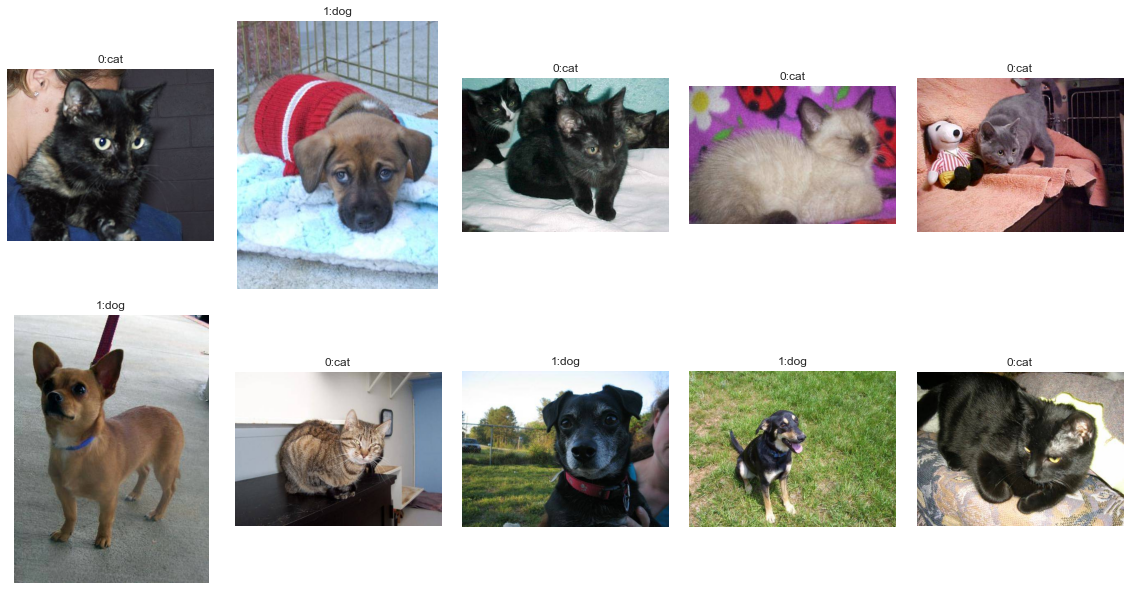

In [227]:
image_names_picked= pick_random_imgs(train_path)
images, labels = get_label(train_path, image_names_picked)
plot_imgs(images, labels)

In [ ]:
# def get_random_imgs(data_path, n_of_images=10):
#     data=[]
#     labels=[]
#     images=[]

#     image_names= os.listdir(data_path)

#     for image_name in image_names:
#         label = image_name.split('.')[0]
#         img = plt.imread(f"{data_path}{image_name}")
#         data.append(img)
    
#     data_picked = random.sample(data, n_of_images)

#     for features,label in data_picked:
#         images.append(features)
#         labels.append(label)
    
#     return images, labels

In [ ]:
def pick_random_imgs(data_path, n_of_images=10):
    labels=[]
    images=[]

    image_names= os.listdir(data_path)
    image_names_picked = random.sample(image_names, n_of_images)

    for image_name in image_names_picked:
        label = image_name.split('.')[0]
        if label == 'cat':
            labels.append(0)
        else:
            labels.append(1)
        img = plt.imread(f"{data_path}{image_name}")
        images.append(img)
    
        
    return images, labels

def plot_imgs(images, labels, ncols = 5, figsize = (20,20), n_of_images=10):
    nrows = int(n_of_images/ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize = figsize)
	
    for i, ax, label in zip(range(n_of_images), axes.flatten(), labels):
        ax.imshow(images[i])
        ax.axis("off")
        if label==0:
            ax.set(title=f'{label}:cat')
        else:
            ax.set(title=f'{label}:dog')

    fig.subplots_adjust(wspace=0.1, hspace=0.1, bottom=0.01, top=0.4)


In [110]:
# def pick_random_imgs(data_path, n_of_images=10):
#     labels=[]
#     images=[]

#     image_names= os.listdir(data_path)
#     image_names_picked = random.sample(image_names, n_of_images)

#     for image_name in image_names_picked:
#         label = image_name.split('.')[0]
#         img = plt.imread(f"{data_path}{image_name}")
#         images.append(img)
#         labels.append(label)
        
#     return images, labels

# def plot_imgs(images, labels, ncols = 5, figsize = (20,20), n_of_images=10):
#     nrows = int(n_of_images/ncols)
#     fig, axes = plt.subplots(nrows, ncols, figsize = figsize)
	
#     for i, ax, label in zip(range(n_of_images), axes.flatten(), labels):
#         ax.imshow(images[i])
#         ax.axis("off")
#         ax.set(title=label)

#     fig.subplots_adjust(wspace=0.1, hspace=0.1, bottom=0.01, top=0.4)

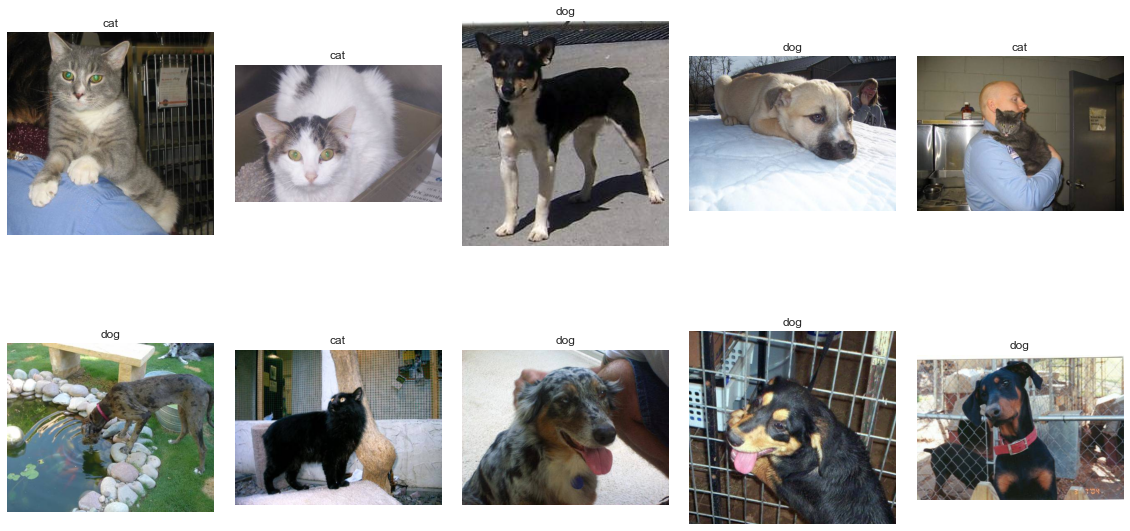

In [111]:
images, labels = pick_random_imgs(train_path)
plot_imgs(images, labels)

In [108]:
# def plot_random_imgs(data_path, n_of_images=10, nrows = 2, ncols = 5, figsize = (20,20)):
#     labels=[]
#     images=[]

#     image_names= os.listdir(data_path)
#     image_names_picked = random.sample(image_names, n_of_images)

#     for image_name in image_names_picked:
#         label = image_name.split('.')[0]
#         img = plt.imread(f"{data_path}{image_name}")
#         images.append(img)
#         labels.append(label)

#     fig, axes = plt.subplots(nrows, ncols, figsize = figsize)
	
#     for i, ax, label in zip(range(n_of_images), axes.flatten(), labels):
#         ax.imshow(images[i])
#         ax.axis("off")
#         ax.set(title=label)

#     fig.subplots_adjust(wspace=0.1, hspace=0.1, bottom=0.01, top=0.4)


In [5]:
# def pick_images(n_of_images=10, folder = train_path):
#     images = []
# 	# generate a list of ten random labels among 'cat', and 'dog'
# 	# generate a list of ten random numbers
# 	# these ten labels+numbers pick ten random images saved in images list
#     labels = [random.choice(["cat", "dog"]) for i in range(n_of_images)]
#     numbers = random.sample(range(len(df_cat)), n_of_images)


# 	# randomly pick ten images according to randomly picked labels and numbers
#     for label, number in zip(labels, numbers):
#         image = plt.imread(f"{folder}/{label}.{number}.jpg")
# 		# save the image to images list
#         images.append(image)
#     return images, labels


# def display_images(images, labels, n_of_images=10, nrows = 2, ncols = 5, figsize = (20,20)):

#     fig, axes = plt.subplots(nrows, ncols, figsize = figsize)
	
#     for i, ax, label in zip(range(n_of_images), axes.flatten(), labels):
#         ax.imshow(images[i])
#         ax.axis("off")
#         ax.set(title=label)

#     fig.subplots_adjust(wspace=0.1, hspace=0.1, bottom=0.01, top=0.4)


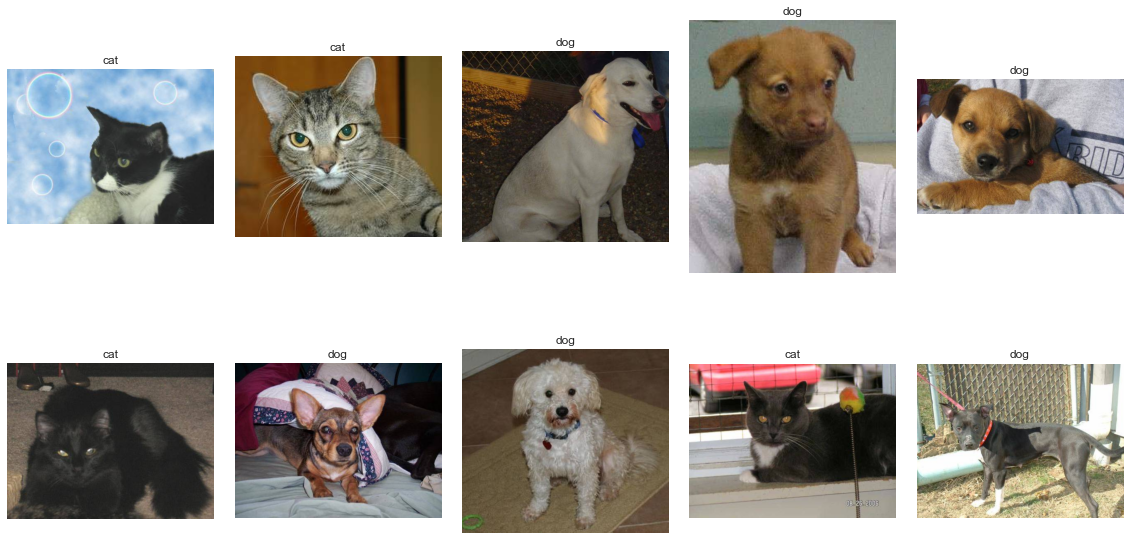

In [6]:
# images, labels = pick_images()
# display_images(images, labels)

train_dir="/kaggle/input/dogs-vs-cats/train/train"
len(os.listdir(train_dir))
test_dir="/kaggle/input/dogs-vs-cats/test/test"
len(os.listdir(train_dir))

c) Skapa folderstrukturen nedan med Python, Notera att det är okej att ha fler pythonskript, notebooks, fler experiment, eller annat relevant i labbfoldern. Glöm inte att ha gitignore på datafilerna.

In [191]:
folder_size = ['small', 'tiny']
folder_type = ['train', 'test', 'val']

for size in folder_size:
    try:
        os.mkdir(f"experiment_{size}_data")
        for type in folder_type:
            os.mkdir(f"experiment_{size}_data/{type}")
    except FileExistsError as err:
        shutil.rmtree(f"experiment_{size}_data")
        os.mkdir(f"experiment_{size}_data")
        for type in folder_type:
            os.mkdir(f"experiment_{size}_data/{type}")


d) Nu ska du göra train|val|test split med följande splits:

experiment_small
- train - 1600 (800 dogs, 800 cats)
- val - 400 (200 dogs, 200 cats)
- test - 500 (250 dogs, 250 cats)

experiment_tiny (BONUS)
- train - 160 (80 dogs, 80 cats)
- val - 40 (20 dogs, 20 cats)
- test - 50 (25 dogs, 25 cats)

In [205]:
from sklearn.model_selection import train_test_split
def split_imgs(df_names, small):
    if small=='Yes':
        df_picked = df_names.sample(1250, random_state=42)
        X_train, X_val_test = train_test_split(df_picked, test_size=450, random_state=42)
        X_val, X_test = train_test_split(X_val_test, test_size=250, random_state=42)
    if small=='No':
        df_picked = df_names.sample(125, random_state=42)
        X_train, X_val_test = train_test_split(df_picked, test_size=45, random_state=42)
        X_val, X_test = train_test_split(X_val_test, test_size=25, random_state=42)
    
    return X_train, X_val, X_test

In [193]:
def save_images(processed_images_path, data):
    for img_name in data:
        source_path = f"{train_path}{img_name}"
        target_path = f"{processed_images_path}{img_name}"
        shutil.copyfile(source_path, target_path)

In [206]:
dfs = [df_cat, df_dog]

for df in dfs:
    X_train, X_val, X_test = split_imgs(df, small = 'Yes')
    print(f'train shape {X_train.shape}, val shape {X_val.shape}, test shape {X_test.shape}')
    processed_images_path = f'experiment_small_data/train/'
    save_images(processed_images_path, X_train['file_name'])
    processed_images_path =f'experiment_small_data/val/'
    save_images(processed_images_path, X_val['file_name'])
    processed_images_path =f'experiment_small_data/test/'
    save_images(processed_images_path, X_test['file_name'])

train shape (800, 1), val shape (200, 1), test shape (250, 1)
train shape (800, 1), val shape (200, 1), test shape (250, 1)


In [207]:
dfs = [df_cat, df_dog]

for df in dfs:
    X_train, X_val, X_test = split_imgs(df, small = 'No')
    print(f'train shape {X_train.shape}, val shape {X_val.shape}, test shape {X_test.shape}')
    processed_images_path = f'experiment_tiny_data/train/'
    save_images(processed_images_path, X_train['file_name'])
    processed_images_path =f'experiment_tiny_data/val/'
    save_images(processed_images_path, X_val['file_name'])
    processed_images_path =f'experiment_tiny_data/test/'
    save_images(processed_images_path, X_test['file_name'])

train shape (80, 1), val shape (20, 1), test shape (25, 1)
train shape (80, 1), val shape (20, 1), test shape (25, 1)


for img_name in train_data:
    source_path = f"{train_dir}/{img_name}"
    target_path = f"{processed_images_path}/{img_name}"
    shutil.copyfile(source_path, target_path)


e) Läs in dataseten från experiment_small, experiment_tiny och plocka ut labelsvektorer, som ska vara
one-hot encoded med 0 och 1.
- plotta några bilder med deras respektive labels och kontrollera att det är korrekt.


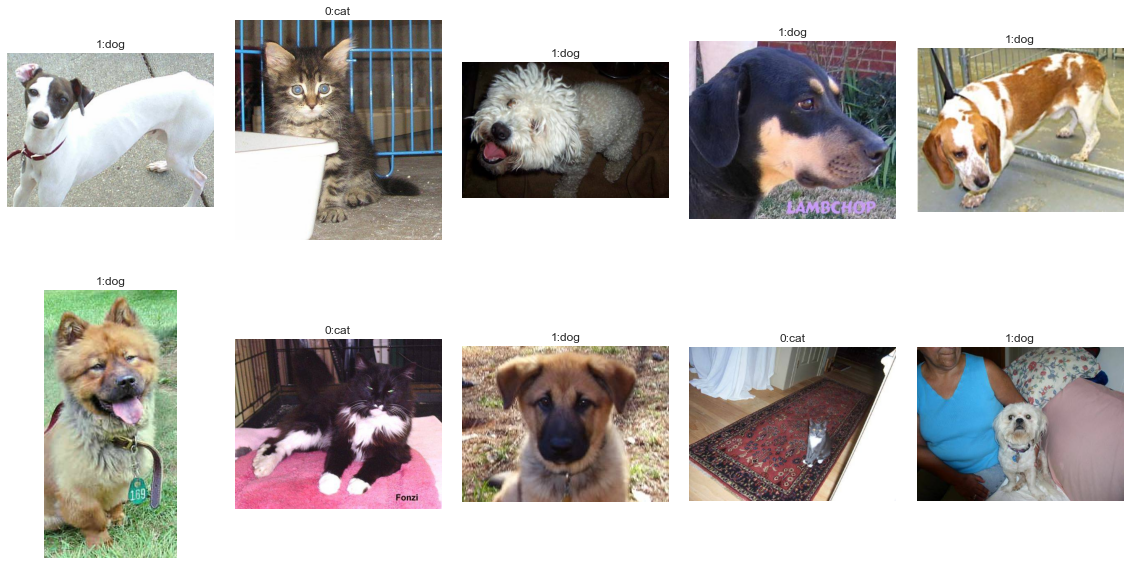

In [208]:
images, labels = pick_random_imgs('experiment_tiny_data/train/')
plot_imgs(images, labels)

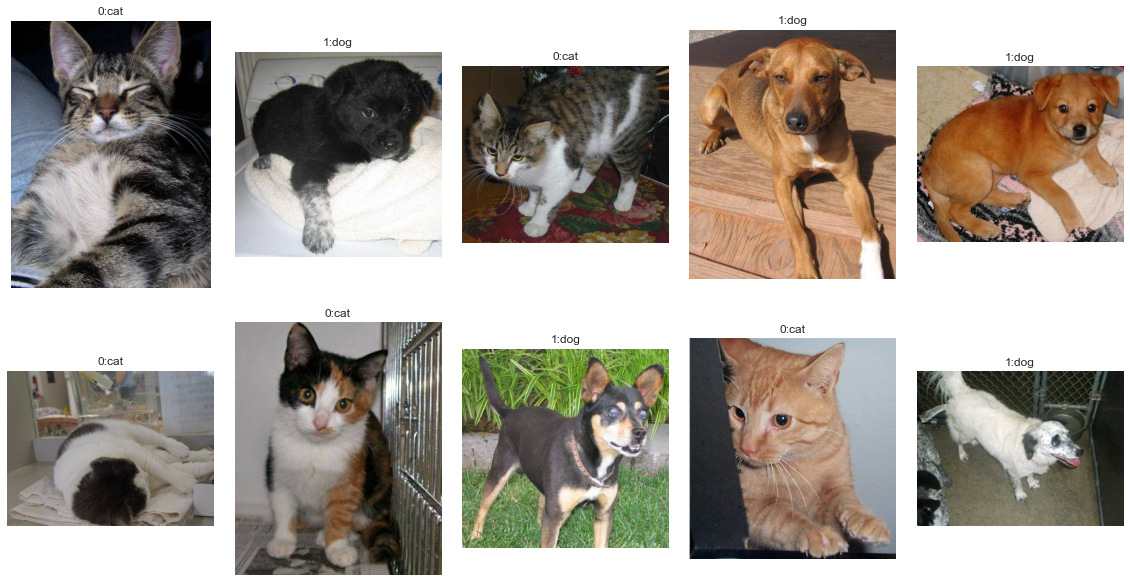

In [209]:
images, labels = pick_random_imgs('experiment_small_data/train/')
plot_imgs(images, labels)

In [223]:
def pick_random_imgs(data_path, n_of_images=10):

    image_names= os.listdir(data_path)
    image_names_picked = random.sample(image_names, n_of_images)
    return image_names_picked

def get_label(data_path, image_names_picked):
    labels=[]
    images=[]

    for image_name in image_names_picked:
        label = image_name.split('.')[0]
        if label == 'cat':
            labels.append(0)
        else:
            labels.append(1)
        img = plt.imread(f"{data_path}{image_name}")
        images.append(img)
    images = np.asarray(images, dtype=object)    
    labels = np.asarray(labels)
    # np.asarray to solve problem: 'list' object has no attribute 'shape'
        
    return images, labels

def plot_imgs(images, labels, ncols = 5, figsize = (20,20), n_of_images=10):
    nrows = int(n_of_images/ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize = figsize)
	
    for i, ax, label in zip(range(n_of_images), axes.flatten(), labels):
        ax.imshow(images[i])
        ax.axis("off")
        if label==0:
            ax.set(title=f'{label}:cat')
        else:
            ax.set(title=f'{label}:dog')

    fig.subplots_adjust(wspace=0.1, hspace=0.1, bottom=0.01, top=0.4)


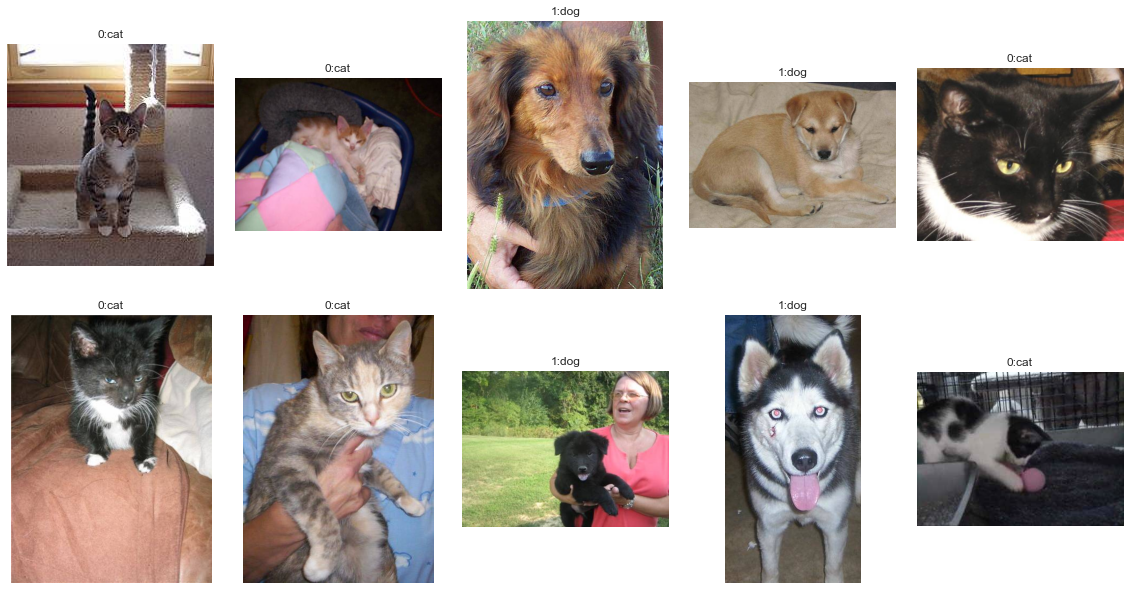

In [213]:
image_names_picked= pick_random_imgs('experiment_small_data/train/')
images, labels = get_label(train_path, image_names_picked)
plot_imgs(images, labels)

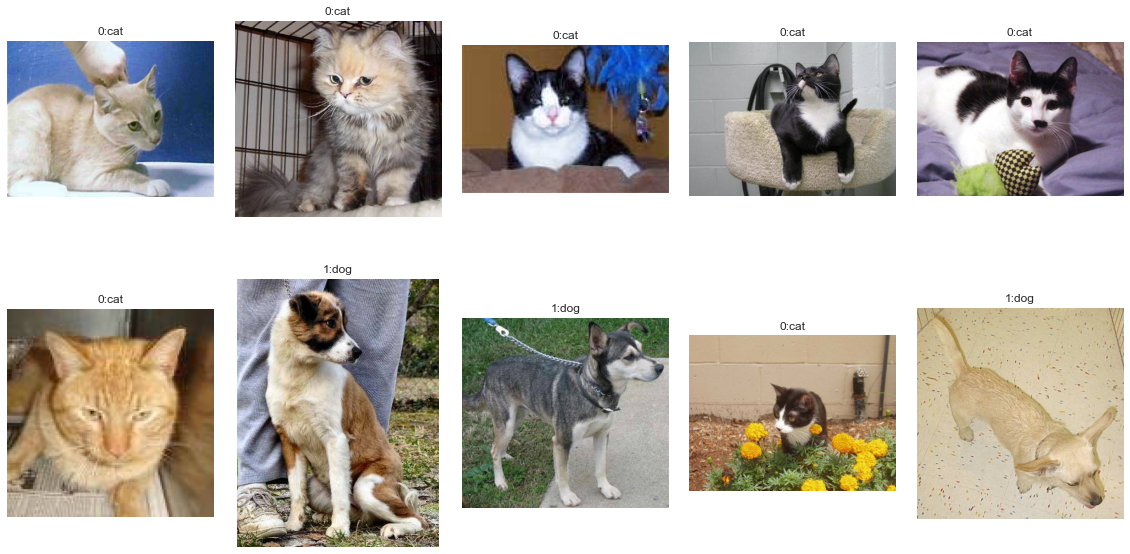

In [212]:
image_names_picked= pick_random_imgs(train_path)

images, labels = get_label(train_path, image_names_picked)
plot_imgs(images, labels)

In [224]:
X_train_small, y_train_small = get_label("experiment_small_data/train/", image_names_picked=os.listdir("experiment_small_data/train/"))


In [225]:
X_train_small.shape, y_train_small.shape

((1600,), (1600,))

In [ ]:
X_train_small, y_train_small = get_label("experiment_small_data/train/", image_names_picked=os.listdir("experiment_small_data/train/"))
X_val_small, y_val_small  = get_label("experiment_small_data/val/")
X_test_small, y_test_small = get_label("experiment_small_data/test/")

X_train_tiny, y_train_tiny = get_label("experiment_tiny_data/train/")
X_val_tiny, y_val_tiny = get_label("experiment_tiny_data/val/")
X_test_tiny, y_test_tiny = get_label("experiment_tiny_data/test/")

In [19]:
def get_label(datadir):
    data=[]
    labels=[]
    images=[]
    CATEGORIES = ["cat", "dog"]

    imagefiles=[os.path.join(datadir,f) for f in os.listdir(datadir)]
    for image in imagefiles:
        category = image.split('/')[-1].split('.')[0]
        img = cv2.imread(image)
        data.append([img, CATEGORIES.index(category)])
        np.random.seed(42)
        np.random.shuffle(data)
    for features,label in data:
        images.append(features)
        labels.append(label)
    
    return images, labels

In [35]:
X_train_small, y_train_small = get_label("experiment_small_data/train/")
X_val_small, y_val_small  = get_label("experiment_small_data/val/")
X_test_small, y_test_small = get_label("experiment_small_data/test/")

X_train_tiny, y_train_tiny = get_label("experiment_tiny_data/train/")
X_val_tiny, y_val_tiny = get_label("experiment_tiny_data/val/")
X_test_tiny, y_test_tiny = get_label("experiment_tiny_data/test/")

In [36]:
X_train_tiny

[array([[[134, 144, 154],
         [111, 120, 129],
         [153, 158, 161],
         ...,
         [ 66,  69,  60],
         [ 65,  70,  61],
         [ 65,  73,  63]],
 
        [[123, 132, 141],
         [146, 154, 161],
         [204, 208, 209],
         ...,
         [ 49,  50,  41],
         [ 48,  51,  42],
         [ 50,  53,  44]],
 
        [[176, 182, 187],
         [215, 220, 223],
         [248, 250, 250],
         ...,
         [ 41,  39,  29],
         [ 42,  40,  30],
         [ 45,  40,  31]],
 
        ...,
 
        [[186, 146, 104],
         [187, 147, 105],
         [188, 148, 106],
         ...,
         [173, 134,  95],
         [173, 134,  95],
         [173, 134,  95]],
 
        [[194, 155, 111],
         [194, 155, 111],
         [195, 156, 112],
         ...,
         [178, 140,  98],
         [178, 140,  98],
         [178, 140,  98]],
 
        [[202, 163, 119],
         [203, 164, 120],
         [203, 164, 120],
         ...,
         [191, 153, 111],
  

In [37]:
y_train_tiny

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0])

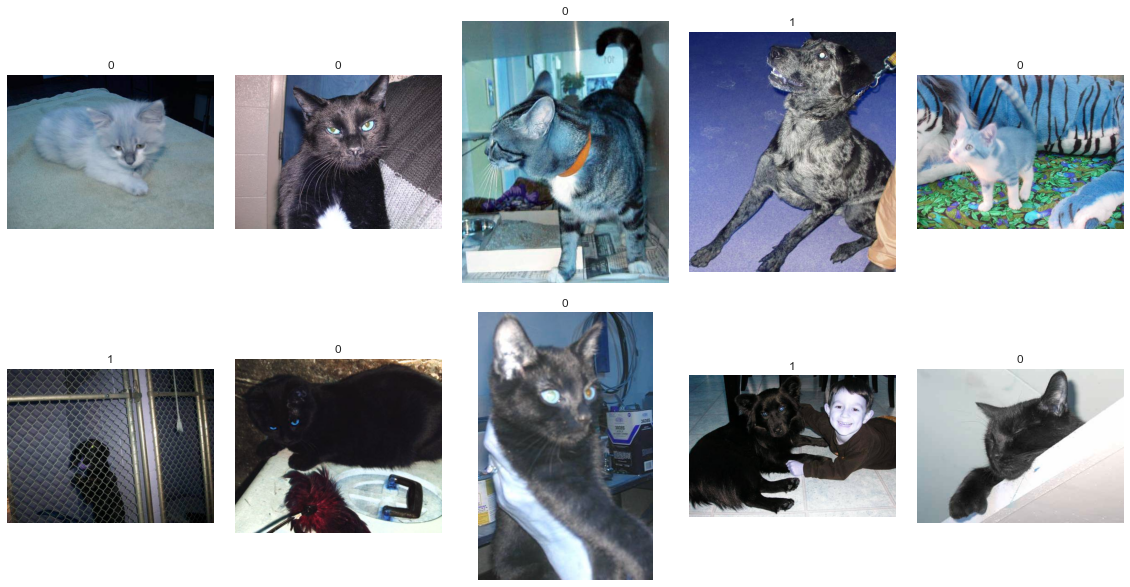

In [29]:
display_images(X_train_small, y_train_small)

In [38]:
X_train_tiny.shape

AttributeError: 'list' object has no attribute 'shape'

- skapa lämplig plot för att kontrollera att dataseten är balanserade


In [ ]:
data = [y_train_small, y_val_small, y_test_small, y_train_tiny, y_val_tiny, y_test_tiny]
dataset_name = ["Small Dataset train", "Small Dataset val", "Small Dataset test", "Tiny Dataset train", "Tiny Dataset val", "Tiny Dataset test"]

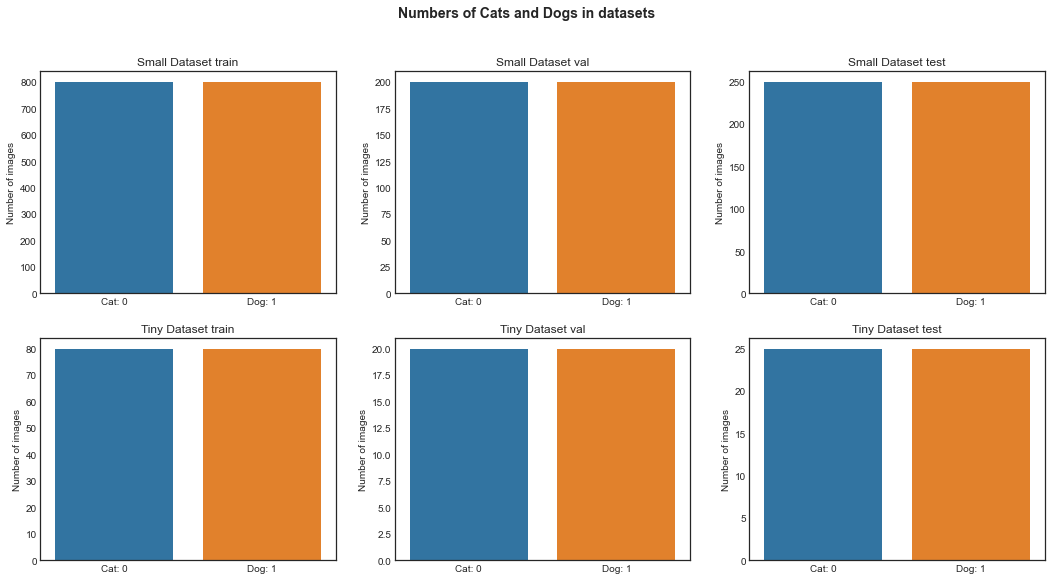

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 9))

for ax, dataset, name in zip(axes.flatten(), data, dataset_name):
    sns.countplot(x=dataset, ax=ax)
    ax.set(title=name, ylabel="Number of images")
    ax.set_xticklabels(["Cat: 0", "Dog: 1"], size=10)

fig.suptitle("Numbers of Cats and Dogs in datasets", size=14, fontweight="bold");

- skapa lämplig plot för att kontrollera att dataseten är slumpade (dvs inte ex [0, 0, ... 0, 1, 1, ..., 1]).

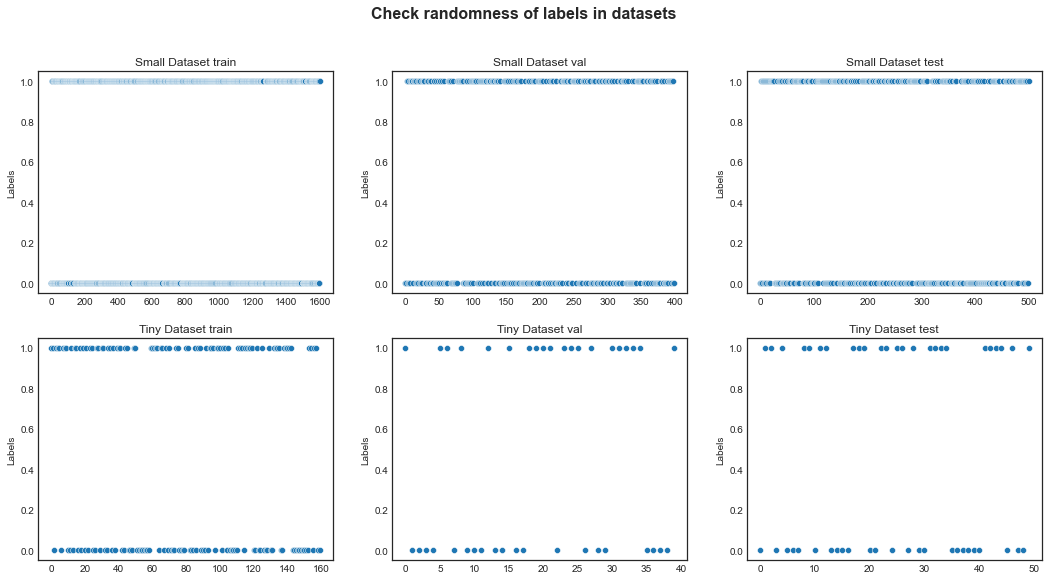

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 9))

for ax, dataset, name in zip(axes.flatten(), data, dataset_name):
    sns.scatterplot(data=dataset, ax=ax)
    ax.set(title=name, ylabel="Labels")
    ax.yticklabels=[0,1]

fig.suptitle("Check randomness of labels in datasets", size=16, fontweight="bold");